<a href="https://colab.research.google.com/github/xhang24/xiaotong/blob/master/src/hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
import matplotlib.pyplot as plt
h = 0.1
def BM(n):
    tt = []
    ttt = []
    i = 0
    sum = 0
    while i<n:
        tt.append(sum)
        AA = sum/np.sqrt(2*(h*i)*np.log(np.log(h*i)))
        ttt.append(AA)
        sum = sum+np.sqrt(h)*np.random.randn(1)[0]
        i = i+1
    return([tt,ttt])

In [0]:
def pic_wi_path(num,sta,en,h):
  path=mc_wi_path(num,sta,en,h)
  x0=sta
  n=int((en-sta)/h)
  x_ls=[x0,]
  for i in range(n):
    x0+=h
    x_ls.append(x0)
  for i in range(num):
    plt.plot(x_ls,path[i+1]) 
 


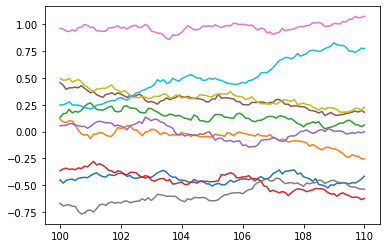

In [93]:
pic_wi_path(10,100,110,0.1)

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [95]:
import numpy as np
import math
import scipy.stats as ss
import matplotlib.pyplot as plt
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price #this will be used for calibration
    
    def explain_yourself(self):
      if self.otype==1:
        print('I am call')
      elif self.otype==-1:
        print('I am put')

        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      maturity = self.maturity
      return max([0, (s - k)*otype])



class Gbm:
    def __init__(self,
                 init_state = 100.,
                 drift_ratio = .0475,
                 vol_ratio = .2,
                 nstep=5,
                 N = 1000
                ):
        self.init_state = init_state
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio
        self.nstep = nstep
        self.N = N
    def stk_price(self,option):
        n = self.n_step
        T = option.maturity
        s0 = self.init_state
        sigma = self.vol_ratio
        r = self.drift_ratio

        w_s=0
        h=T/n
        stk_ls=np.zeros(1)
        stk_ls[0]=s0
        for i in range(n):         
          b=np.random.normal(0,1)
          w_s+=math.sqrt(h)*b
          s=s0*np.exp((r-0.5*(sigma**2))*h*(i+1)+sigma*w_s)
          stk_ls=np.append(stk_ls,s)
        return stk_ls

    def asianprice(self,VanillaOption):
 
        r = self.drift_ratio
        sigma = self.vol_ratio
        n = self.nstep
        N = self.N
        s0 = self.init_state
        K = VanillaOption.strike
        T = VanillaOption.maturity
        Optiontype = VanillaOption.otype
        
        W=[]
        X=[]
        sum = 0
        sum2 = 0
        CT = 0
        AA = 0
        i=0
        while i<N:
            h = T/n
            W.append(sum)
            AA=s0*np.exp(h*i*(r-0.5*np.square(sigma))+sigma*W[i])
            sum2 = sum2+AA
            X.append(AA)
            sum = sum+np.sqrt(h)*np.random.randn(1)[0]
            ave = sum2/N
            CT = CT+np.exp(-r*h*i*np.max([ave-K, 0]))
            i=i+1
        return(CT/N)

gbm1 = Gbm()
option1 = VanillaOption()

gbm1.asianprice(option1)

0.3056033404207596